# Exercise 01: Wine Dataset Assessment

I've copied the Exercise 00 notebook to get you started.

Work through the notebook, making the necessary changes to analyze the **wine** dataset ([here](https://scikit-learn.org/stable/datasets/toy_dataset.html))
and answer the questions.

## Installing Modules

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib seaborn pandas

## Loading and Assessing the Iris Dataset

Load the pre-canned wine dataset:

In [2]:
from sklearn import datasets
dataset = datasets.load_wine()

`dataset` has type `Bunch` [here](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html), which is essentially a fancy dictionary:

In [4]:
type(dataset)

sklearn.utils._bunch.Bunch

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

The keys we're most interested in are `'data'`, `'target'`, `'target_names'`, and `'feature_names'`.

`'target_names'` contains the labels for each class:

In [6]:
dataset['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

and `'target'` contains the correct `'target_name'` **index** for each entry in `'data'`:

In [7]:
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

The `'data'` array can be quite large.  Each row is an example and each column is a feature for that example.  in this case, there are 178 examples, each with 13
features:

In [8]:
dataset['data'].shape

(178, 13)

In [9]:
dataset['data'][0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

What do these numbers mean?  The `'feature_names'` array tells us:

In [10]:
dataset['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

We can get a feel for the iris dataset by creating scatter plots from pairs of features.

Documentation of interest:
- [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
- [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
- [axis.set](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html)
- [axis.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)

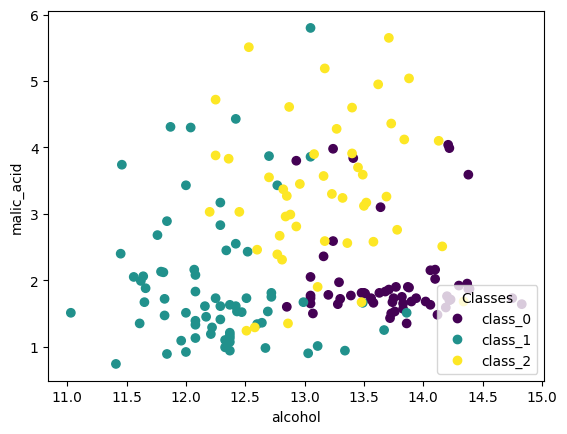

In [11]:
import matplotlib.pyplot as plt
from random import randrange

_, ax = plt.subplots()

scatter = ax.scatter(
    dataset.data[:, 0],
    dataset.data[:, 1],
    c=dataset.target
)

ax.set(
    xlabel=dataset.feature_names[0],
    ylabel=dataset.feature_names[1]
)

ax.legend(
    scatter.legend_elements()[0],
    dataset.target_names,
    loc="lower right",
    title="Classes"
);

Creating these plots manually can be tedious, so we'll use Seaborn `pairplot` to create every feature combo in one command.

First, we need to convert the `scikit-learn` dataset into a `pandas` dataframe.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="ticks", color_codes=True)

df = pd.DataFrame(
    data=np.c_[dataset['data'], dataset['target']], # concatenate 'data' and 'target' values
    columns=dataset['feature_names'] + ['Class']  # concatenate 'feature_names' and "Class"
)

/tmp/ipykernel_30249/2462339765.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  Class  
0                            3.92   1065.0    0.0  
1                            3.40   1050.0    0.0  
2                            3.17   1185.0    0.0  
3                            3.45   1480.0    0.0  
4                            2.93    735.0    0.0  
..                            ...      ...    ...  
173                          1.74    740.0    2.0  
174                          1.56    750.0    2.0  
175                          1.56    835.0    2.0  
176                          1.62    840.0    2.0  
177                          1.60    560.0    2.0  

[178 rows x 14 columns]

Next, we'll convert the numeric `'Species'` to strings by converting that column to "category" data and then mapping the values.

In [14]:
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.rename_categories(dataset['target_names'])

Useful documentation:
* [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**NOTE: THIS CAN TAKE A WHILE TO RENDER!**

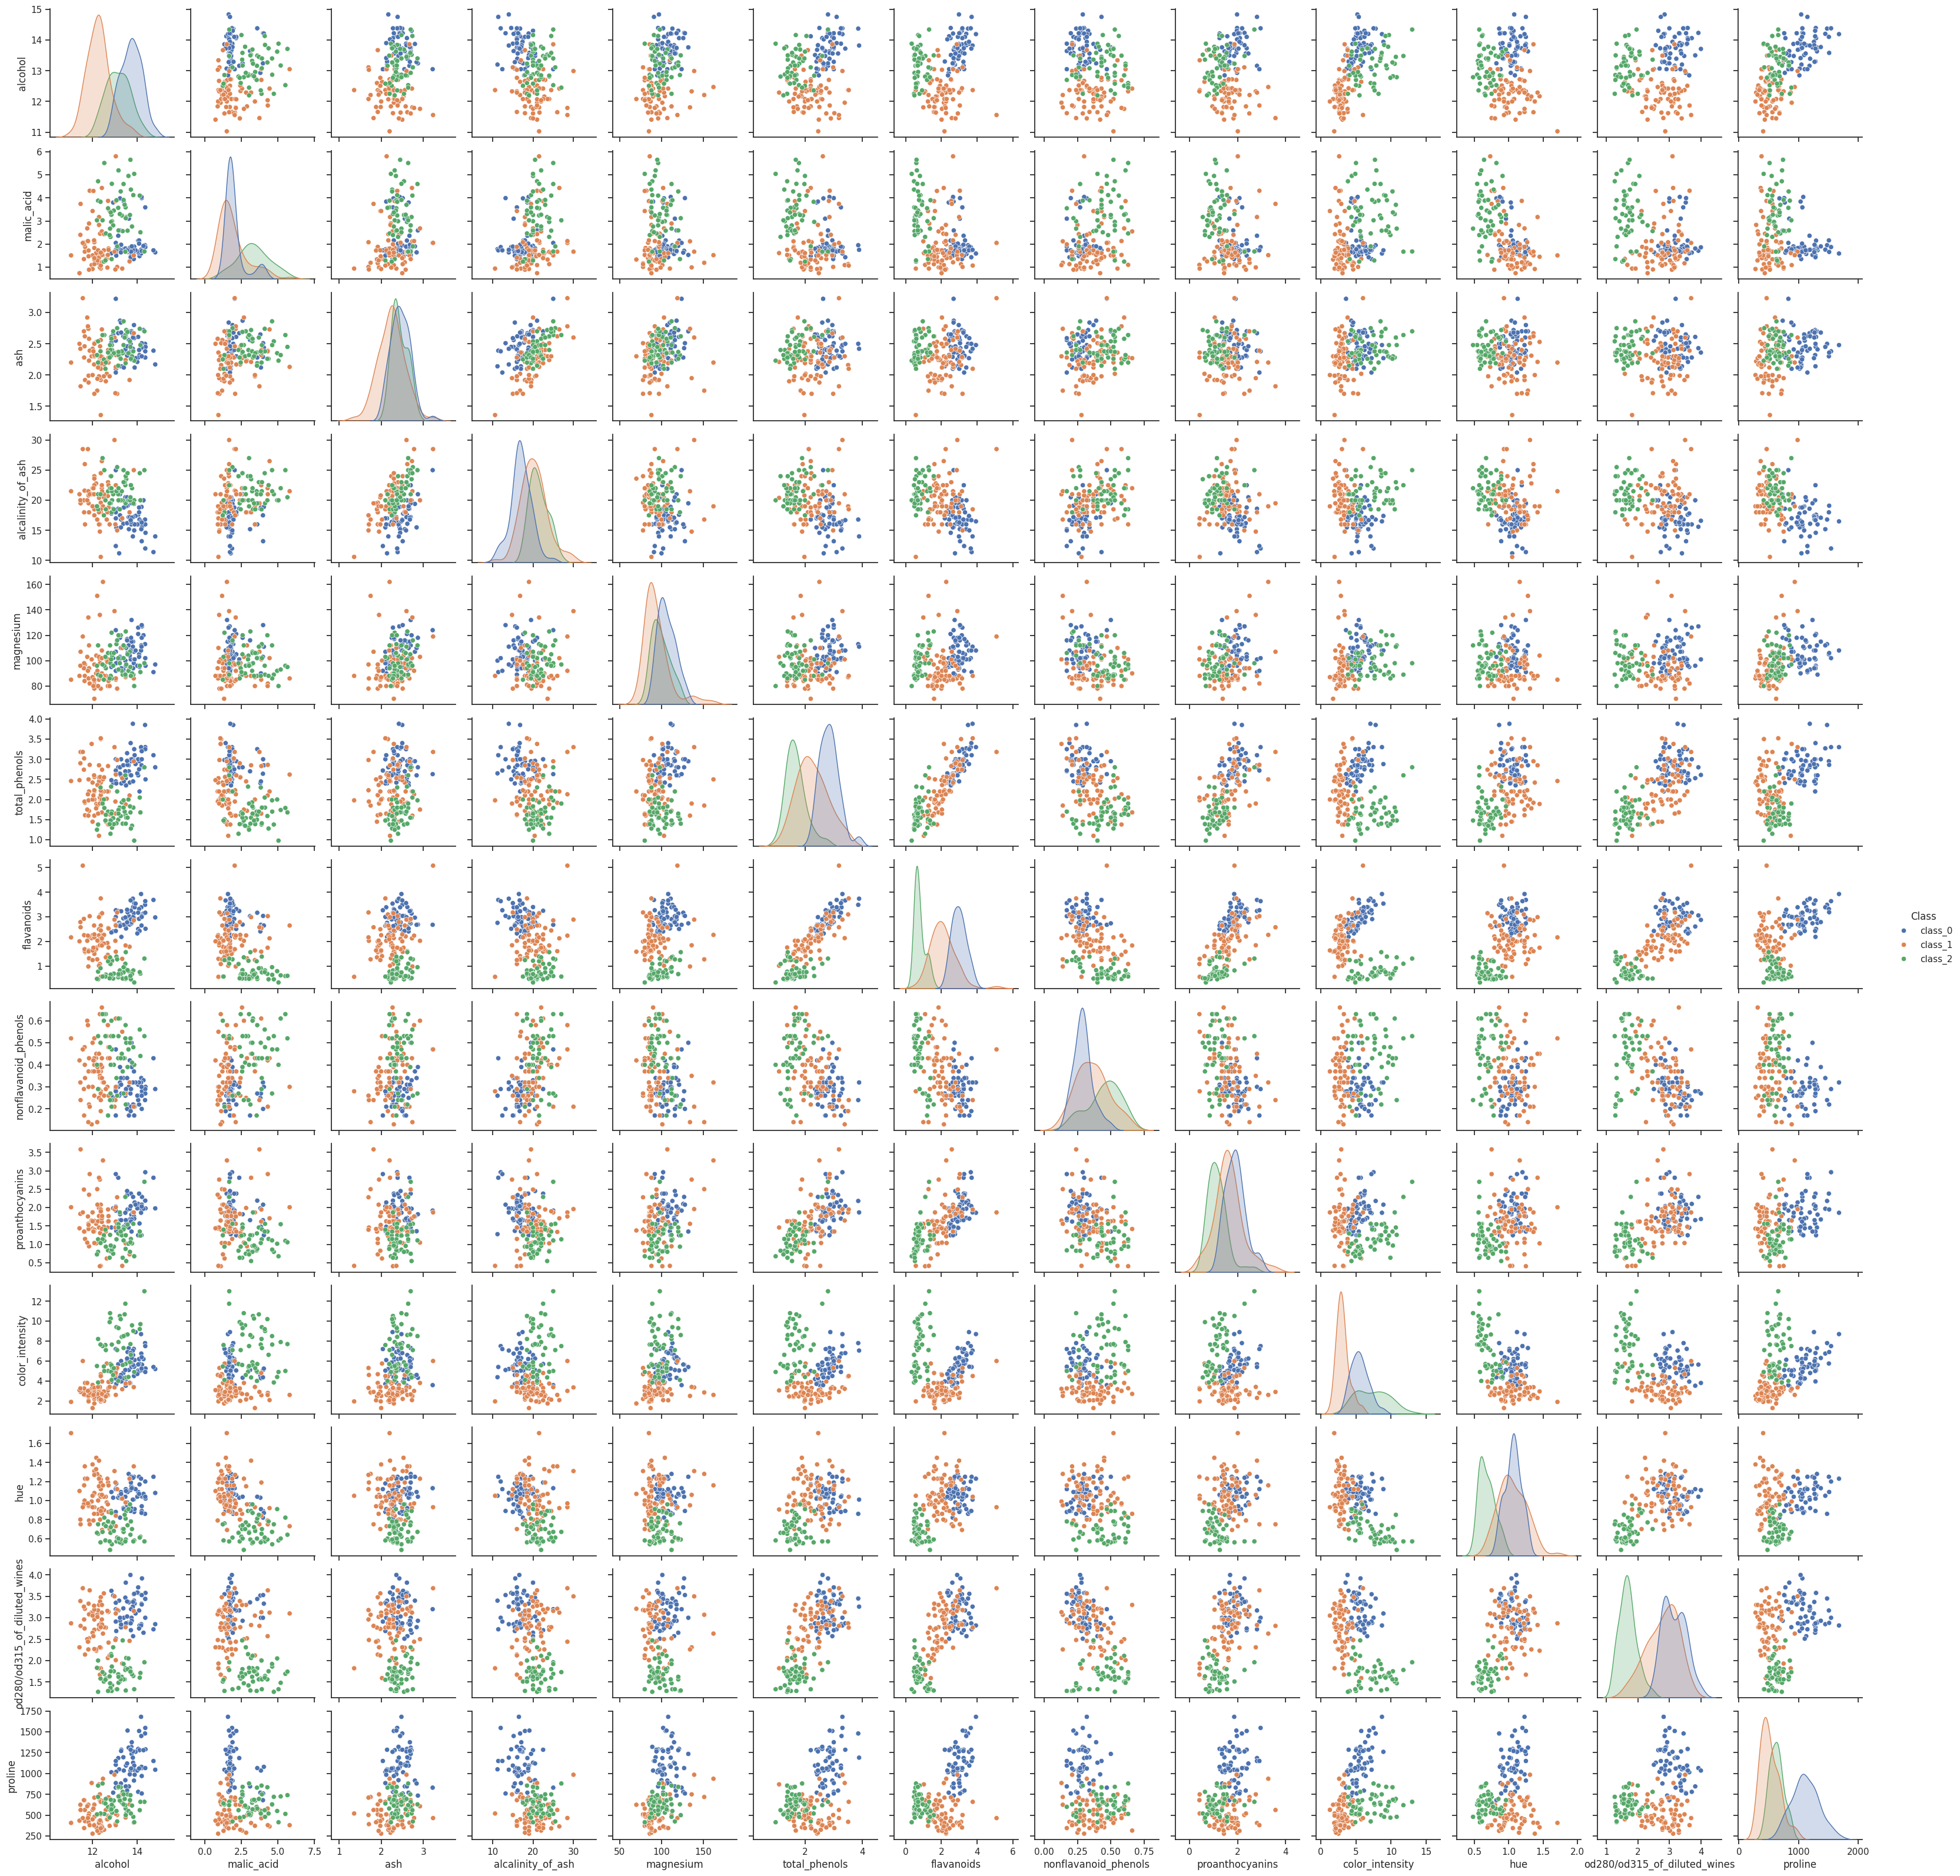

In [15]:
import seaborn as sns

g = sns.pairplot(
    df,
    hue="Class"
)

Based on the plots above, how well do you think ML models will perform?